In [1]:
# Let’s generate some linear-looking data to test
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X +np.random.rand(100, 1)

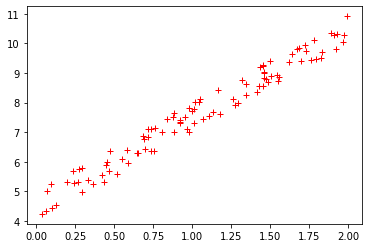

In [2]:
import matplotlib.pyplot as plt
plt.plot(X, y, "r+")

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.53165035],
       [2.96792585]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.53165035],
       [10.46750205]])

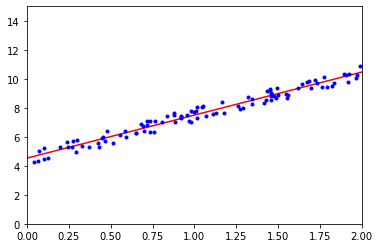

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
#Linear Regression using Scikit-Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.53165035]), array([[2.96792585]]))

In [8]:
lin_reg.predict(X_new)

array([[ 4.53165035],
       [10.46750205]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.53165035],
       [2.96792585]])

In [10]:
# pseudoinverse
np.linalg.pinv(X_b).dot(y)

array([[4.53165035],
       [2.96792585]])

In [11]:
# Linear Regression Model with gredient descent
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.53165035],
       [2.96792585]])

In [13]:
# This code implements Stochastic Gradient Descent using a simple learning schedule:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

In [14]:
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization

In [15]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [16]:
theta

array([[4.50170262],
       [2.98358836]])

In [17]:
# To perform Linear Regression using Stochastic GD with Scikit-Learn, you can use the SGDRegressor class
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.53395677]), array([3.01638507]))

## Y = mX + b
### Where Y = predicted value, m = Slope, X = independent variable, b =intercept

In [19]:
import pandas as pd
from sklearn import linear_model

In [20]:
df = pd.read_csv(r"C:\Users\windows10\Desktop\Hands_on_Machine_Learniing\code_basics\ML\1_linear_reg\homeprices.csv")

In [21]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


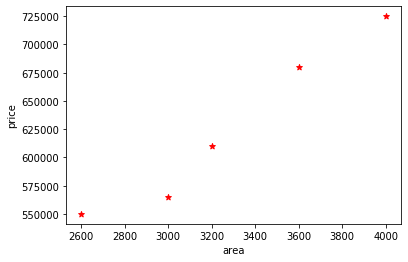

In [22]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, marker = '*', color = "red")

In [23]:
area = df.drop('price', axis = "columns")

In [24]:
price = df.price

In [25]:
area

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [26]:
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [27]:
reg = linear_model.LinearRegression()
reg.fit(area, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
reg.predict([[3300]])

array([628715.75342466])

In [29]:
reg.coef_

array([135.78767123])

In [30]:
reg.intercept_

180616.43835616432

In [31]:
area_df = pd.read_csv(r"C:\Users\windows10\Desktop\Hands_on_Machine_Learniing\code_basics\ML\1_linear_reg\areas.csv")

In [32]:
area_df.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [33]:
p = reg.predict(area_df)

In [34]:
p[0:5]

array([316404.10958904, 384297.94520548, 492928.08219178, 661304.79452055,
       740061.64383562])

In [35]:
area_df["prices"] = p

In [36]:
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [37]:
# area_df.to_csv("prediction.csv")

In [38]:
per_capita_income = pd.read_csv(r'C:\Users\windows10\Desktop\Hands_on_Machine_Learniing\code_basics\ML\1_linear_reg\Exercise\canada_per_capita_income.csv')

In [39]:
per_capita_income.head()
per_capita_income.columns

Index(['year', 'per capita income (US$)'], dtype='object')

In [40]:
X = per_capita_income.drop('per capita income (US$)', axis = 1)

In [41]:
y = per_capita_income['per capita income (US$)']

In [42]:
y.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per capita income (US$), dtype: float64

In [43]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
reg.predict([[2020]])

array([41288.69409442])

In [45]:
reg.coef_

array([828.46507522])

In [46]:
reg.intercept_

-1632210.7578554575